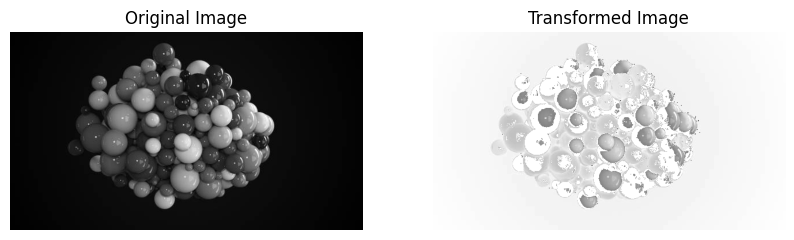

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Function f(x) as described in the problem
def f(x):
    if 0 < x <= 0.25:
        return 1 - x
    elif 0.25 < x <= 0.5:
        return 1
    elif x > 0.5:
        return x
    return x


# Apply f(x) to an image
def apply_fx_to_image(image):
    # Normalize image to [0, 1] range
    image_normalized = image / 255.0

    # Apply f(x) element-wise to the image
    vectorized_fx = np.vectorize(f)
    transformed_image = vectorized_fx(image_normalized)

    # Denormalize back to [0, 255] range
    transformed_image = (transformed_image * 255).astype(np.uint8)

    return transformed_image


# Read an input image
image_path = "image.jpg"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the transformation
transformed_image = apply_fx_to_image(image)

# Display the original and transformed images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

# Transformed image
plt.subplot(1, 2, 2)
plt.title("Transformed Image")
plt.imshow(transformed_image, cmap="gray")
plt.axis("off")

plt.show()

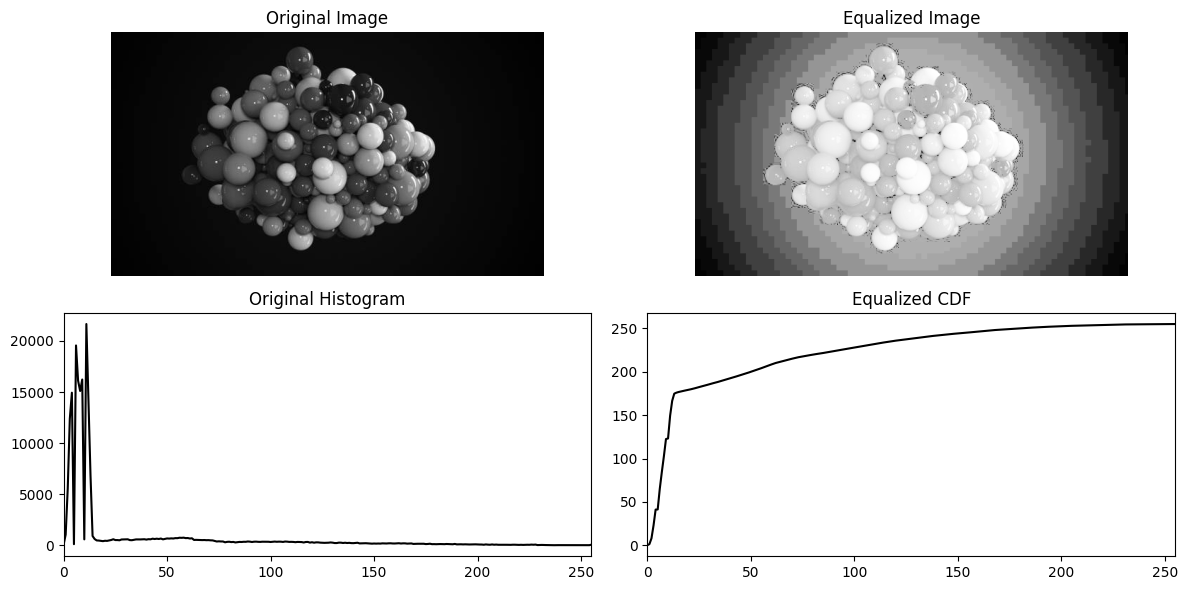

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def myhist_equ(image):
    # Step 1: Compute the histogram of the image
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])

    # Step 2: Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Step 3: Normalize the CDF to range [0, 255]
    cdf_normalized = cdf * float(255) / cdf[-1]  # Normalize to [0, 255]

    # Step 4: Map the CDF values to the original image
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    image_equalized = image_equalized.reshape(image.shape).astype(np.uint8)

    return image_equalized, hist, cdf_normalized


# Read the input image
image_path = "image.jpg"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image, original_hist, equalized_cdf = myhist_equ(image)

# Plot the original image, equalized image, histograms, and CDFs
plt.figure(figsize=(12, 6))

# Original image and histogram
plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Equalized image and histogram
plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap="gray")
plt.title("Equalized Image")
plt.axis("off")

# Original histogram
plt.subplot(2, 2, 3)
plt.plot(original_hist, color="black")
plt.title("Original Histogram")
plt.xlim([0, 255])

# Equalized CDF
plt.subplot(2, 2, 4)
plt.plot(equalized_cdf, color="black")
plt.title("Equalized CDF")
plt.xlim([0, 255])

plt.tight_layout()
plt.show()